### farshidhesami@gmail.com

https://scikit-learn.org/stable/datasets/real_world.html

https://scikit-learn.org/stable/datasets/toy_dataset.html

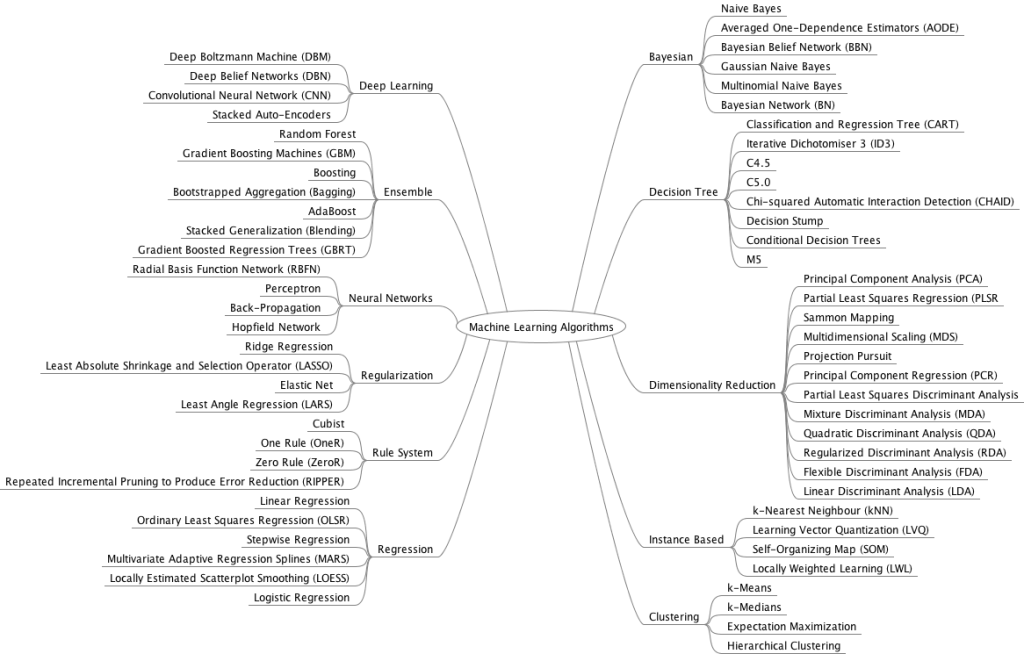

### Machine Learning Algorithms and indicating whether they are commonly used in regression, classification :

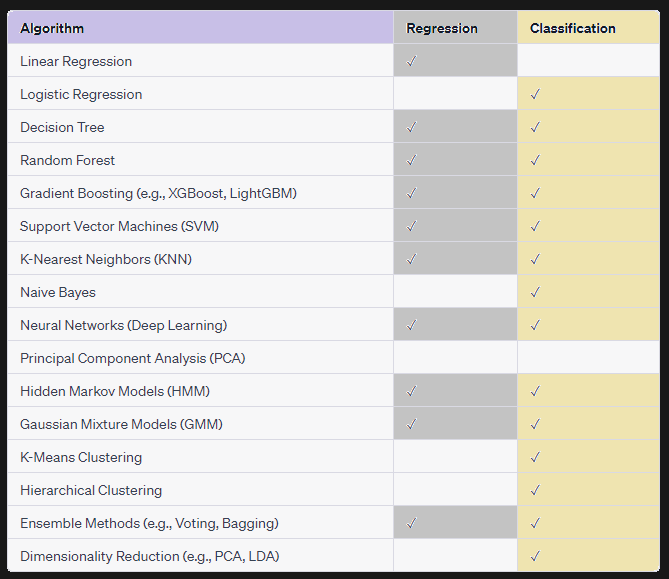

## Machine learning algorithms and techniques, along with their typical applications:

### 1. Linear Regression: 
 - Used for regression problems. It predicts a continuous outcome variable based on the value of one or multiple predictor variables.

### 2. Logistic Regression: 
- Used for classification problems. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function.

### 3. Decision Trees: 
- Used for both regression and classification problems. They work for both categorical and continuous input and output variables.

### 4. Random Forest: 
- An ensemble learning method used for both regression and classification problems. It operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

### 5. Support Vector Machines (SVM): 
- Primarily used for classification problems, but can be used for regression as well. In the SVM algorithm, we plot each data item in the dataset in an N-dimensional space, with the value of each feature being the value of a particular coordinate.

### 6. Naive Bayes: 
- A classification technique based on Bayes' Theorem with an assumption of independence among predictors. Naive Bayes is easy to build and particularly useful for large datasets.

### 7. K-Nearest Neighbors (KNN): 
- Can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry.

### 8. Gradient Boosting algorithms (GBM, XGBoost, LightGBM)**: 
- These are powerful machine learning algorithms that are primarily used for regression and classification problems. They build an ensemble of weak prediction models, typically decision trees.

### 9. Neural Networks: 
- Can be used for both regression and classification problems. They are particularly well-suited to handling complex, high-dimensional data, such as images or text.

### 10. Principal Component Analysis (PCA): 
- A dimensionality reduction technique used to reduce the dimensionality of large data sets.

### 11. Hidden Markov Model (HMM): 
- Used in reinforcement learning and temporal pattern recognition such as speech, handwriting, gesture recognition, part-of-speech tagging, musical score following, partial discharges and bioinformatics.

### 12. Gaussian Mixture Models (GMM): 
- Used in clustering problems, density estimation and generative learning models.

### 13. K-Means Clustering: 
- An unsupervised learning algorithm used for clustering problems where we need to find subgroups within data.

### 14. Hierarchical Clustering: 
- Another unsupervised machine learning algorithm that is used to group together the unlabeled data points having similar characteristics.

### 15. Ensemble Methods (Voting, Bagging, etc.): 
 - Meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking). 
 - They can be used for both regression and classification problems.

### 16. Linear Discriminant Analysis (LDA): 
- Primarily used for dimensionality reduction and classification. 
- It's a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events.

- Remember, the choice of algorithm depends on the size, quality, and nature of the data, the distribution of the data, and the specific use case. It's often a good idea to try multiple approaches and see which one works best for your specific problem.


### How write a code ?

- 1. Reads the data from the 'Temperatures.csv' file using pandas.
- 2. Selects the target variable.
- 3. Defines a function to generate flowcharts for different attributes.
- 4. Calls the function to generate flowcharts for the 'Outlook', 'Temperature', 'Humidity', and 'Wind' attributes.
- 5. Determines the best day predicted to be good for playing tennis using each decision tree classifier.
- 6. Performs cross-validation to evaluate the decision tree models.
- 7. Prints the cross-validation scores for each attribute.


### import cross_val_score into the code :

#### criterion='entropy'

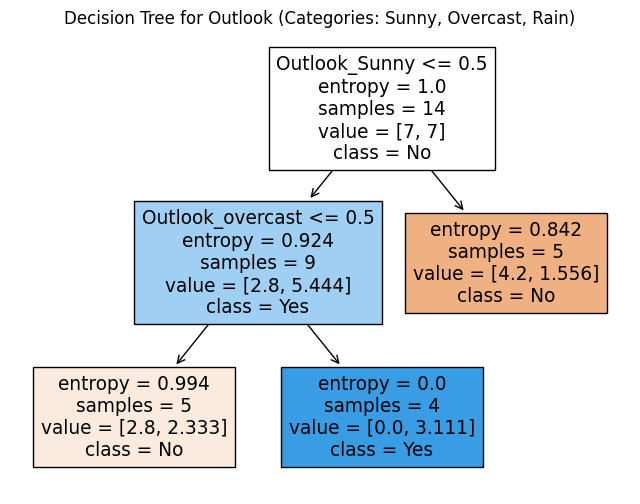

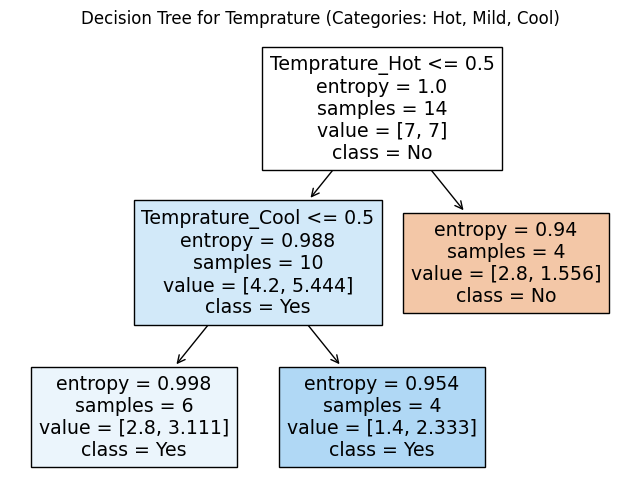

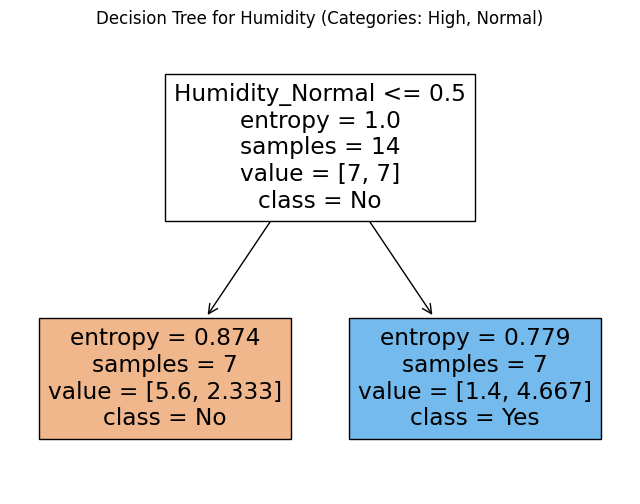

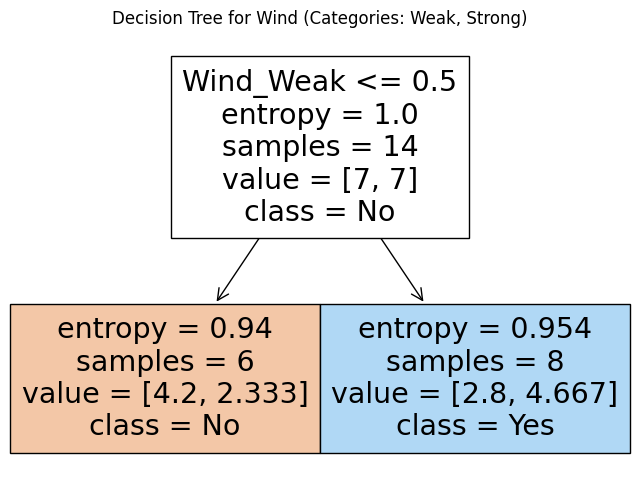

Best day predicted to be good for playing tennis: D1
Best day predicted to be good for playing tennis (Temprature): D4
Best day predicted to be good for playing tennis (Humidity): D5
Best day predicted to be good for playing tennis (Wind): D1
Cross-validation scores (Outlook): [0.66666667 0.66666667 0.33333333 0.66666667 0.5       ]
Cross-validation scores (Temprature): [0.33333333 0.         0.33333333 0.66666667 0.        ]
Cross-validation scores (Humidity): [0.33333333 1.         0.66666667 0.66666667 1.        ]
Cross-validation scores (Wind): [0.66666667 0.66666667 1.         0.         1.        ]


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Specify the file path
file_path = 'training_course/Temperatures.csv'

# Read the CSV file using pd.DataFrame()
data = pd.read_csv(file_path)

# Select the target variable
y = data['Play_tennis']

# Define a function to generate a flowchart for an attribute  or add  ## criterion='entropy'
def generate_flowchart(attribute, categories, criterion='entropy'):  
    # Select the attribute for analysis
    X = data[[attribute]]

    # Convert categorical variables into numerical representations using one-hot encoding
    X_encoded = pd.get_dummies(X)
    
    # Create an instance of the DecisionTreeClassifier and set the parameters
    clf = DecisionTreeClassifier(criterion=criterion, class_weight='balanced', max_features='sqrt', max_depth=5, min_samples_split=2, min_samples_leaf=1)
    
    # Fit the model to the data
    clf.fit(X_encoded, y)

    # Generate a simplified flowchart representation for the decision tree
    fig, ax = plt.subplots(figsize=(8, 6))
    tree.plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True, ax=ax)
    plt.title(f"Decision Tree for {attribute} (Categories: {', '.join(categories)})")
    plt.show()

    # Return the trained classifier and encoded attribute
    return clf, X_encoded

# Generate a flowchart for the Outlook attribute with 3 categories
outlook_categories = ['Sunny', 'Overcast', 'Rain']
outlook_clf, outlook_X_encoded = generate_flowchart('Outlook', outlook_categories, criterion='entropy')

# Generate a flowchart for the Temprature attribute with 3 categories
temperature_categories = ['Hot', 'Mild', 'Cool']
temperature_clf, temperature_X_encoded = generate_flowchart('Temprature', temperature_categories, criterion='entropy')

# Generate a flowchart for the Humidity attribute with 2 categories
humidity_categories = ['High', 'Normal']
humidity_clf, humidity_X_encoded = generate_flowchart('Humidity', humidity_categories, criterion='entropy')

# Generate a flowchart for the Wind attribute with 2 categories
wind_categories = ['Weak', 'Strong']
wind_clf, wind_X_encoded = generate_flowchart('Wind', wind_categories, criterion='entropy')

# Determine the best day predicted to be good for playing tennis using the Wind classifier
best_day = data.loc[wind_clf.predict(wind_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis:", best_day)

# Determine the best day predicted to be good for playing tennis using the Temprature decision tree
best_day_temperature = data.loc[temperature_clf.predict(temperature_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis (Temprature):", best_day_temperature)

# Determine the best day predicted to be good for playing tennis using the Humidity decision tree
best_day_humidity = data.loc[humidity_clf.predict(humidity_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis (Humidity):", best_day_humidity)

# Determine the best day predicted to be good for playing tennis using the Wind decision tree
best_day_wind = data.loc[wind_clf.predict(wind_X_encoded) == 'Yes', 'Day'].values[0]
print("Best day predicted to be good for playing tennis (Wind):", best_day_wind)

# Perform cross-validation to evaluate the decision tree models
cv_scores_outlook = cross_val_score(outlook_clf, outlook_X_encoded, y, cv=5)
cv_scores_temperature = cross_val_score(temperature_clf, temperature_X_encoded, y, cv=5)
cv_scores_humidity = cross_val_score(humidity_clf, humidity_X_encoded, y, cv=5)
cv_scores_wind = cross_val_score(wind_clf, wind_X_encoded, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores (Outlook):", cv_scores_outlook)
print("Cross-validation scores (Temprature):", cv_scores_temperature)
print("Cross-validation scores (Humidity):", cv_scores_humidity)
print("Cross-validation scores (Wind):", cv_scores_wind)


## "split" in a decision tree :

- The "split" in a decision tree refers to the process of dividing the data into two or more homogeneous subsets based on a particular feature and a threshold value. 
- This division helps in creating branches or sub-trees in the decision tree structure.
- The split operation is an essential step in the decision tree algorithm, as it determines how the data is partitioned at each node of the tree. 
- The goal is to find the best split that : 
   - Maximizes the separation of classes (in classification) 
   - Minimizes the impurity or variance (in regression) within each resulting subset.

- The scikit-learn decision tree algorithm uses various splitting criteria to evaluate and select the best feature and threshold for the split. 
- Two commonly used splitting criteria are :
   - Gini impurity. 
   - information gain (based on entropy).


### 1. Gini impurity: 
 - It measures the probability of incorrectly classifying a randomly chosen element from the dataset if it were randomly labeled according to the class distribution in the subset. The Gini impurity ranges from 0 (pure node) to 1 (impure node). The split with the lowest Gini impurity is preferred.

### 2. Information gain: 
- It calculates the reduction in entropy (or average information) achieved by splitting the data based on a particular feature. Entropy measures the impurity or disorder in a set of samples. The split with the highest information gain is chosen.

- To determine the Best split, scikit-learn evaluates the splitting criteria for all possible features and thresholds and selects the one that optimizes the criterion. 

- The algorithm considers different splitting strategies,depending on the type of feature (continuous or categorical) and the algorithm variant. such as:
   - Binary splits 
   - Multiway splits, 

Once the split is determined, the data is divided into two subsets based on the:
 - selected feature 
 - Threshold value. 

- The process then recursively continues for each resulting subset until certain stopping criteria are met, such as reaching :
  - Maximum depth
  - Minimum number of samples per leaf
  - Minimum improvement in impurity.


### The sklearn.tree.DecisionTreeClassifier class in scikit-learn has various :

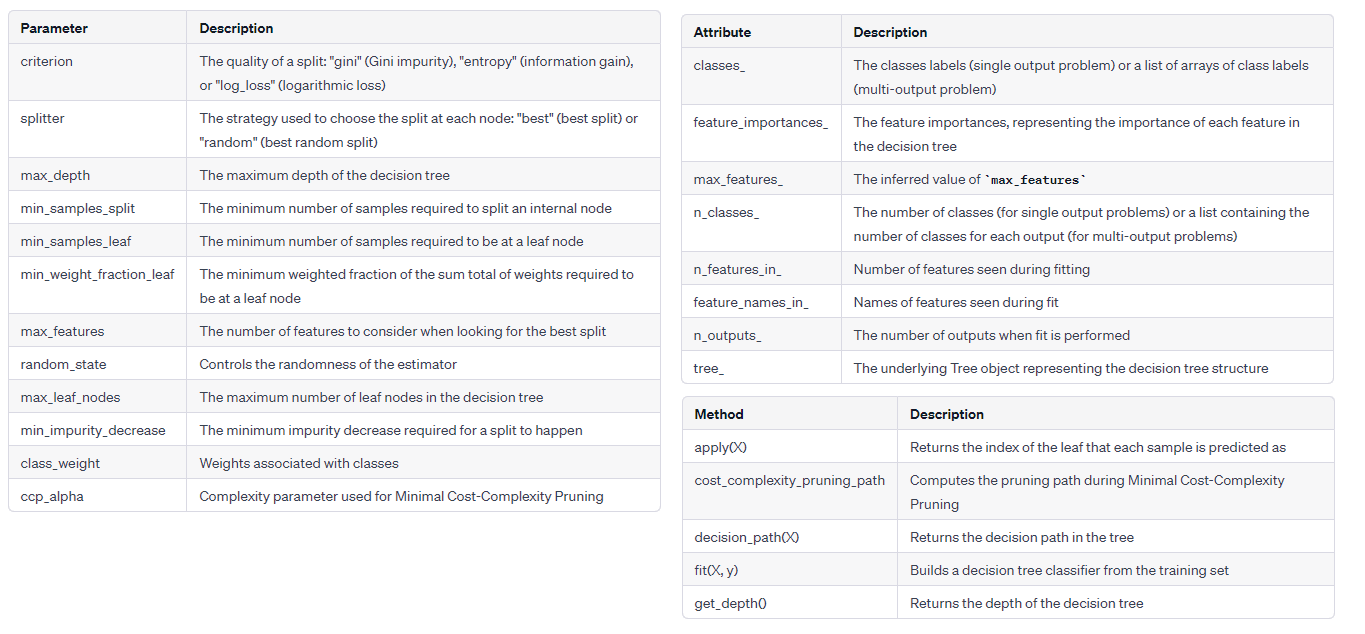

### The `criterion` parameter :
- in the `DecisionTreeClassifier` class determines the quality of a split in a decision tree.

### There are 3 supported options for the `criterion` parameter:

- 1. **"gini"**: 
    - This criterion uses Gini impurity as the measure of impurity or the degree of class impurity at a node. Gini impurity ranges from 0 to 1, where 0 represents a pure node (all samples belong to the same class), and 1 represents an impure node (samples are evenly distributed across classes). 
- 2. **"entropy"**: 
    - This criterion uses information gain based on entropy as the measure of impurity. Entropy is a statistical measure of disorder or uncertainty in a set of samples. It ranges from 0 to infinity, where 0 represents a pure node, and higher values indicate higher impurity. The information gain is calculated as the reduction in entropy achieved by splitting the data based on a particular feature.
- 3. **"log_loss"**: 
   - This criterion uses logarithmic loss, also known as cross-entropy, as the measure of impurity. Logarithmic loss is commonly used in binary classification tasks. It measures the performance of a probabilistic classifier by comparing the predicted probabilities to the true class labels. Logarithmic loss ranges from 0 to infinity, where lower values indicate better predictions.

### There are 2 options for the `splitter` parameter:

### 1 - best : 

- This is the default value for the `splitter` parameter. It uses a "best" strategy to select the feature that results in the most optimal split. The "best" strategy evaluates all possible splits and chooses the one that maximizes a particular criterion (e.g., Gini impurity, entropy, or logarithmic loss, depending on the `criterion` parameter). This strategy generally leads to a more accurate but potentially deeper and more computationally expensive tree.

### 2 - random:

- This option uses a "random" strategy to select the feature for splitting. Instead of evaluating all features and selecting the best one, it randomly selects a subset of features and chooses the best split from that subset. 
- The number of features considered at each split is controlled by the `max_features` parameter. 
- This strategy can be useful when dealing with high-dimensional datasets, as it can reduce the computational cost of building the tree. However, it may result in slightly lower accuracy compared to the "best" strategy.

- The choice of `splitter` depends on the specific requirements of your problem. 
- The "best" splitter is generally recommended when you have a relatively small number of features and want to achieve the best possible accuracy. 
- On the other hand, if you have a large number of features or if computational efficiency is a concern, you can use the "random" splitter and adjust the `max_features` parameter accordingly.

### The `max_depth` parameter :
 -  the maximum depth or the maximum number of levels that the decision tree can grow.

- A decision tree grows by recursively splitting nodes based on features until a stopping criterion is met, which can be the maximum depth reached, the minimum number of samples required to split a node, or other criteria.

### Here's an explanation of the `max_depth` parameter:

#### max_depth=None: 
- The default value of `max_depth` is `None`, which means there is no maximum depth limit for the tree. The tree will keep growing and splitting until all leaves are pure (contain only samples of one class) or until all nodes contain fewer samples than the minimum required to split (controlled by the `min_samples_split` parameter), or until another stopping criterion is met. 

- This can lead to overfitting if the tree becomes too deep and captures noise or irrelevant patterns in the training data.

#### max_depth=int: 
- You can specify an integer value for `max_depth` to limit the depth of the decision tree. 
- For example, setting `max_depth=3` means that the tree can have a maximum depth of 3 levels. When the specified `max_depth` is reached, the tree stops growing and no further splits are performed.

- Limiting the depth of the tree can help prevent " overfitting ", simplify the model, and improve generalization to unseen data. 
- However, setting a very small `max_depth` may result in an " underfitting model "  that fails to capture complex patterns in the data.

- It's important to find an appropriate value for `max_depth` that balances between model complexity and generalization. 

#### This value can be determined using techniques like:

-	Cross-validation.
-	Grid search.

#### By tuning the `max_depth` parameter, you can control the trade-off between:

-	model simplicity. 
-	model  accuracy.


### The `min_samples_split` parameter:

- Minimum number of samples required to split an internal node. It determines whether a node should be further split based on the number of samples it contains.

#### Min_samples_split=int : 
- When an integer value is provided, such as `min_samples_split=2`, the decision tree requires at least that many samples in a node to be eligible for further splitting. 
- If the number of samples in a node is less than `min_samples_split`, the node becomes a leaf node, and no further splitting is performed. 
T- his helps prevent the tree from continuing to split nodes with very few samples, which can lead to “ overfitting “. 
- Increasing the value of `min_samples_split` can result in a simpler model with “ less complexity “.

#### Min_samples_split=float : 
- Alternatively, you can specify a float value between 0 and 1, such as `min_samples_split=0.5`. 
- In this case, the value represents a proportion of the total number of samples. 
- For example, if `min_samples_split=0.5` and a node has 100 samples, the node must have at least 50 samples to be eligible for further splitting. 
- Using a float value allows you to set a minimum threshold based on the proportion of samples rather than a fixed number. 
- This can be useful when dealing with large datasets where the absolute number of samples may vary.

- Setting an appropriate value for `min_samples_split` is important to control the growth of the decision tree and prevent overfitting. 
- A smaller value allows the tree to capture finer details and potentially leads to “ overfitting “, 
- while a larger value promotes generalization but may result in “ underfitting ” if the data contains complex patterns.


### The `min_samples_leaf` :

- Specifies the minimum number of samples required to be present in a leaf node. It determines the minimum size of the leaf nodes in the decision tree.

- Here's an explanation of the `min_samples_leaf` parameter:

#### Min_samples_leaf=int: 

- When an integer value is provided, such as `min_samples_leaf=1`, the decision tree will create leaf nodes as long as they contain at least the specified number of samples. 
- If a potential split results in a leaf node with fewer samples than `min_samples_leaf`, the split is not performed, and the node becomes a leaf node. 
- This helps prevent the tree from creating leaf nodes with very few samples, which can lead to overfitting. 
- Increasing the value of `min_samples_leaf` can result in a simpler model with less complexity.

#### Min_samples_leaf=float:

- Alternatively, you can specify a float value between 0 and 1, such as `min_samples_leaf=0.5`. 
- In this case, the value represents a proportion of the total number of samples. 
- For example, if `min_samples_leaf=0.5` and a potential split results in a leaf node with 100 samples, the split will not be performed if the leaf node would contain fewer than 50 samples. 



### The `min_weight_fraction_leaf` :

- specifies the minimum weighted fraction of the total number of samples required to be present in a leaf node. 

- Here's an explanation of the `min_weight_fraction_leaf` parameter:

#### min_weight_fraction_leaf=float:

- This parameter takes a float value between 0 and 1, such as `min_weight_fraction_leaf=0.1`. 
- The value represents the minimum weighted fraction of the total number of samples required to be present in a leaf node. 

- The weight of each sample is determined by the `sample_weight` parameter passed to the `fit` method of the classifier.
- The weighted fraction is calculated as the sum of the weights of the samples in a leaf node divided by the sum of all the sample weights.

- The purpose of `min_weight_fraction_leaf` is similar to `min_samples_leaf`, but it allows you to specify the minimum fraction of weighted samples required in a leaf node instead of an absolute number. 



### The `max_features` parameter:

- Determines the number of features to consider when looking for the best split during the construction of a decision tree. 
- It controls the subset of features that are randomly sampled at each split point.

#### Here's an explanation of the `max_features` parameter:

### Max_features=int : 
When `max_features` is an integer value, such as `max_features=10`, it represents the maximum number of features to consider at each split.
- The algorithm will randomly select `max_features` features from the total number of features in the dataset and use them to evaluate the quality of each split. 
- This can be useful for reducing the ” computational cost “ and “ overfitting “ by considering only a subset of features.

#### Max_features=float : 
- If `max_features` is a float value between 0 and 1, such as `max_features=0.5`, it represents the fraction of total features to consider at each split. 
- This can help reduce the “ complexity “ and “ overfitting “ of the model.

- max_features={"auto", "sqrt", "log2"}`**: 
  - "auto" (default): It will consider all features for classification.
  - "sqrt": It will consider the square root of the total number of features. 
  - "log2": It will consider the logarithm base 2 of the total number of features. 

- The purpose of `max_features` is to control the randomness in feature selection during the tree construction process. By limiting the number of features, - you can reduce the computational burden and increase the diversity among the trees in an ensemble. 
If you set `max_features` to `None`, which is the default value, it means that the algorithm will consider all features at each split, resulting in the full dimensionality of the dataset being used. This can be suitable for small datasets or when you want the decision tree to have access to all the available information for each split.


### The `random_state` parameter :

- is used to set the random seed for the random number generator. 
- It controls the randomization applied during the training process, making the results reproducible.

- Here's an explanation of the `random_state` parameter:

#### random_state=int : 
- When you specify an integer value for `random_state`, such as `random_state=42`, it sets the seed for the random number generator. This is useful for obtaining consistent results and making your experiments reproducible.

#### random_state=RandomState instance : 
- Instead of providing an integer, you can pass an instance of the `RandomState` class from the `numpy.random` module. This allows you to have more control over the random number generator and its parameters.

#### random_state=None : 
- The random number generator will be initialized using a random seed obtained from the system clock or some other source of randomness. 
This means that each time you run the code, you will get different results, even if you use the same dataset and configuration. This can be useful for introducing randomness in the training process and evaluating the model's robustness to different random variations.

- The purpose of the `random_state` parameter is to ensure the reproducibility of your results. 
- By setting a specific random seed, you can control the randomization used in the algorithm and obtain consistent outcomes. 
- This is particularly important when you want to compare different models or techniques and need to ensure that the only source of variability is the algorithm itself, not the randomization.

- The `random_state` parameter allows you to control the random seed for the random number generator in order to obtain reproducible results during the training process.

### The `min_impurity_decrease` parameter : 

- The impurity of a node represents the amount of uncertainty or disorder in the samples at that node. 
- By splitting nodes in a decision tree, we aim to reduce this impurity and create more homogeneous child nodes.

- It's important to note that if the `sample_weight` parameter is used to assign different weights to samples, the calculations will be based on the weighted sum of the samples.

- Setting a higher value for `min_impurity_decrease` will result in fewer splits being performed since it requires a larger decrease in impurity. On the other hand, a lower value will allow smaller impurity decreases to be considered valid for splitting nodes.

- By adjusting the `min_impurity_decrease` parameter, you can control the trade-off between the complexity of the decision tree (number of splits) and the desire for more significant decreases in impurity during the splitting process.

- It's important to note that the optimal value for `max_features` may vary depending on the characteristics of your dataset and the problem at hand. You can experiment with different values or use techniques like cross-validation to determine the best setting for your specific scenario.



### The `ccp_alpha` parameter :
- is used in the pruning process of a decision tree based on Cost Complexity Pruning (CCP). 

- Pruning is a technique used to prevent overfitting in decision trees by reducing their complexity.

- The `ccp_alpha` parameter controls the complexity-impurity trade-off during the pruning process. It represents the effective complexity parameter of the pruning algorithm. A higher value of `ccp_alpha` increases the amount of pruning applied to the tree, resulting in a simpler tree with fewer nodes.

- The Cost Complexity Pruning algorithm assigns a cost to each node in the tree based on its impurity and the number of samples it represents. 
- It then calculates the total cost of the tree by summing up the costs of all nodes. The pruning process involves iteratively removing the nodes with the highest cost, thereby reducing the complexity of the tree.


- It's important to note that `ccp_alpha` must be a non-negative float value. A value of `0.0` means no pruning will be applied, and the tree will not be pruned based on cost complexity. Positive values of `ccp_alpha` increase the pruning effect.

### The `cost_complexity_pruning_path` method is :
- used to compute the effective alphas and impurities for pruning a decision tree based on the cost complexity criterion.
Pruning is a technique used to prevent overfitting and improve the generalization ability of a decision tree by removing unnecessary branches.

- Here's an explanation of the parameters:

The `cost_complexity_pruning_path` method returns two arrays:

- `ccp_alphas`: An array containing the effective alphas. Effective alpha is a measure of the cost complexity of the decision tree at each pruning step. A higher alpha value indicates a more complex tree.

- `impurities`: An array containing the impurity values of the decision tree at each pruning step. 
 - Impurity is a measure of the heterogeneity or impurity of the samples in each node. By pruning the tree, impurity is reduced.

- These arrays provide information about the trade-off between the complexity of the tree (controlled by alpha) and the impurity of the tree (measured by impurities). By examining these values, you can determine the appropriate pruning level that balances model complexity and generalization performance.

### The `decision_path(X, check_input=True)` :

- method  is used to compute the decision path for the input samples `X`. 
- It returns a sparse matrix of shape `(n_samples, n_nodes)` where non-zero elements indicate that the corresponding samples pass through the nodes of the decision tree.

- Here are the parameters:
  - `X`: 
      - The input samples, represented as an array-like or sparse matrix of shape `(n_samples, n_features)`.
  - `check_input`: 
      - A boolean parameter (default=True) that allows bypassing input checks. 
      - It is recommended to keep it as `True` unless you are confident about the input data.

- The method returns a sparse matrix, where each row corresponds to a sample in `X`, and each column corresponds to a node in the decision tree. If an element in the matrix is non-zero, it indicates that the corresponding sample traverses through the corresponding node.



### Note : The `sklearn.inspection.permutation_importance` function :


- used to calculate the permutation importance of features for evaluating their importance in a fitted estimator. 

- Permutation importance is a technique that assesses the impact of each feature on the model's performance by permuting the values of a feature and measuring the resulting decrease in the model's metric.

- The `permutation_importance` function is useful for understanding the relative importance of features in a model and can help in :
 - feature selection
 - model debugging
 - interpreting the model's behavior.

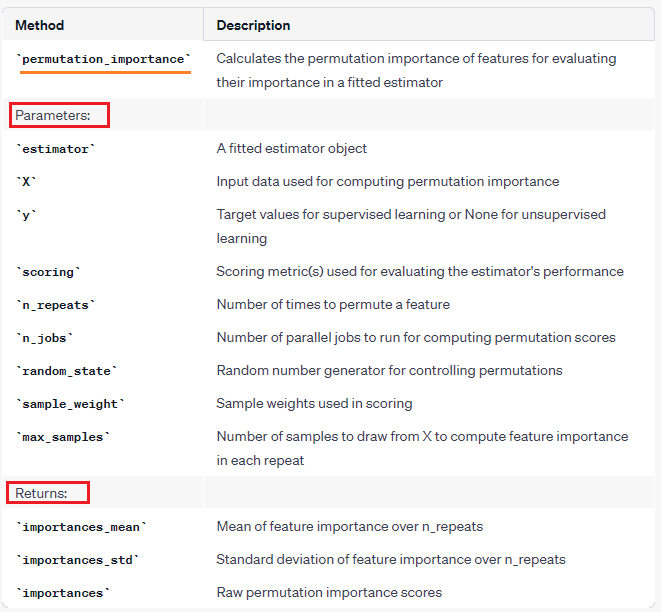




In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Read the Wine dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
data = pd.read_csv(url, names=column_names)

# Split the data into features (X) and target (y)
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForestClassifier to the training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(clf, X_test, y_test, random_state=42)

# Extract the importances from the result
importances = result.importances_mean

# Print the feature importances
for feature_name, importance in zip(X.columns, importances):
    print(f"{feature_name}: {importance}")


Alcohol: 0.022222222222222233
Malic acid: 0.0
Ash: 0.0
Alcalinity of ash: 0.0
Magnesium: 0.0
Total phenols: 0.0
Flavanoids: 0.04444444444444447
Nonflavanoid phenols: 0.0
Proanthocyanins: 0.0
Color intensity: 0.016666666666666673
Hue: 0.0
OD280/OD315 of diluted wines: 0.0
Proline: 0.05555555555555558


### Note : `zip` built-in Python function :

-  is a built-in Python function that takes two or more sequences (iterables) as input and returns an iterator that aggregates elements from each of the input sequences
-  the zip function, it allows iterating over the feature_names and importances lists simultaneously. 


In [13]:
feature_names = ['Alcohol', 'Malic acid', 'Ash']
importances = [0.5, 0.3, 0.2]

for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")


Alcohol: 0.5
Malic acid: 0.3
Ash: 0.2


### The `fit` method :
- In scikit-learn is a common method used to train a machine learning model on a given dataset. 

- The `fit` method takes the following parameters:

- `X`: The input features or independent variables, 
- `y`: The target variable or dependent variable, represented as an array-like object.
- `sample_weight` (optional): An array-like object representing the sample weights. It assigns different weights to individual samples during the training process.
- `check_input` (optional): A boolean value indicating whether to perform input validation checks. It is recommended to keep it `True` unless you have a specific reason to bypass the checks.

- The `fit` method fits the estimator on the provided training data `(X, y)` and learns the underlying patterns in the data to make predictions. The specific behavior of the `fit` method varies depending on the type of estimator being used. It updates the internal model parameters based on the training data and prepares the model for making predictions.

### The `get_depth()` method :

- Such as `DecisionTreeClassifier` and `DecisionTreeRegressor`. It returns the maximum depth of the decision tree.
- The depth of a decision tree is defined as the length of the longest path from the root node to any leaf node in the tree. 
- It represents the number of levels or splits in the tree.
- The output will be the depth of the decision tree, indicating how many levels or splits are present in the tree structure. 
- A deeper tree generally captures more complex relationships in the data but can also be prone to overfitting. 

- Understanding the depth can help in assessing the” complexity” and “interpretability “of the decision tree model.


In [17]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForestClassifier to the training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(clf, X_test, y_test, random_state=42)

# Extract the importances from the result
importances = result.importances_mean

# Print the feature importances
feature_names = data.feature_names
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

# Get the depth of each decision tree in the random forest
for tree in clf.estimators_:
    depth = tree.get_depth()
    print("Depth of the decision tree:", depth)


alcohol: 0.022222222222222233
malic_acid: 0.0
ash: 0.0
alcalinity_of_ash: 0.0
magnesium: 0.0
total_phenols: 0.0
flavanoids: 0.04444444444444447
nonflavanoid_phenols: 0.0
proanthocyanins: 0.0
color_intensity: 0.016666666666666673
hue: 0.0
od280/od315_of_diluted_wines: 0.0
proline: 0.05555555555555558
Depth of the decision tree: 5
Depth of the decision tree: 4
Depth of the decision tree: 5
Depth of the decision tree: 7
Depth of the decision tree: 4
Depth of the decision tree: 4
Depth of the decision tree: 5
Depth of the decision tree: 3
Depth of the decision tree: 4
Depth of the decision tree: 3
Depth of the decision tree: 4
Depth of the decision tree: 5
Depth of the decision tree: 5
Depth of the decision tree: 5
Depth of the decision tree: 6
Depth of the decision tree: 6
Depth of the decision tree: 5
Depth of the decision tree: 4
Depth of the decision tree: 3
Depth of the decision tree: 5
Depth of the decision tree: 6
Depth of the decision tree: 5
Depth of the decision tree: 6
Depth of 

### The get_n_leaves() method:

- used to retrieve the number of leaves in a decision tree in scikit-learn. It returns the total number of terminal nodes (leaves) in the tree.

- The number of leaves in a decision tree represents the complexity of the tree. A higher number of leaves indicates a more complex tree with finer-grained decision boundaries, while a lower number of leaves indicates a simpler tree with broader decision boundaries.

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Fit a DecisionTreeClassifier to the data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Get the number of leaves in the decision tree
num_leaves = clf.get_n_leaves()
print("Number of leaves:", num_leaves)


Number of leaves: 12


### The get_params() method :

- Used to retrieve the current parameters of an estimator or model.
- It returns a dictionary containing the parameter names as keys and their corresponding values.

- The get_params() method is useful when you want to inspect or display the current configuration of a model. By default, it returns all parameters, but you can specify deep=False to exclude parameters of nested objects.

- We can pass deep=True to include all parameters, including those of nested objects. 
- Note : This is useful when you want to access parameters of components within a composite estimator or pipeline.

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Prepare the features and target variables
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Create a LinearRegression model
model = LinearRegression()

# Get the current parameters of the model
params = model.get_params()

# Print the parameters
for param, value in params.items():
    print(f"{param}: {value}")


copy_X: True
fit_intercept: True
n_jobs: None
positive: False


## Note : SimpleImputer  class in scikit-learn :

- The SimpleImputer provides a simple yet effective way to impute or replace missing values with a specified strategy. Used to handle missing values in a dataset. 
- Missing values, represented as NaN or other placeholders, can pose challenges in data analysis and modeling tasks. 
- Imputation refers to the process of: Estimating Filling in missing values with suitable replacements. 

- The SimpleImputer offers various strategies for imputation, including:

### Mean strategy: 
 - Replaces missing values with the mean value of the feature along each column. This strategy is suitable for
     -  “numeric data “.
### Median strategy: 
 - Replaces missing values with the median value of the feature along each column. This strategy is also suitable for
     -  “numeric data “.
### Most frequent strategy:
 - Replaces missing values with the most frequent value (mode) of the feature along each column. This strategy can be used with both numeric and 
     - “categorical data “. 
### Constant strategy: 
 - Replaces missing values with a constant value specified by the fill value parameter. This strategy can be used with both :
     - ” numeric and categorical data “.


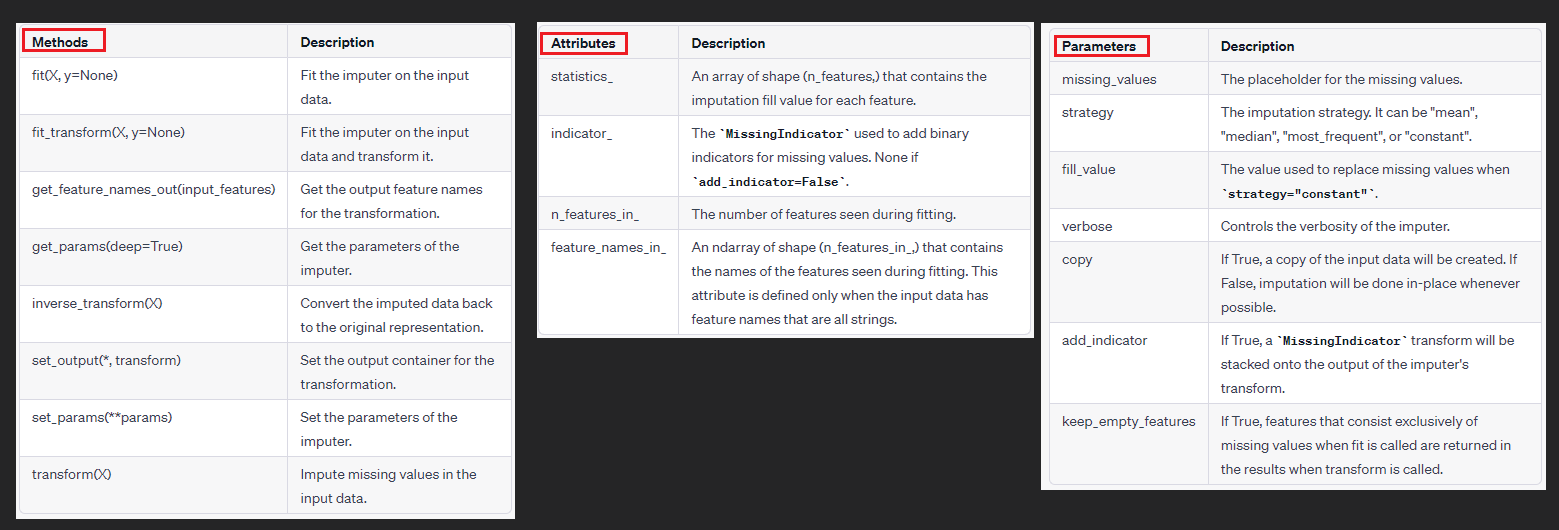

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)



# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")
    
# Get the maximum depth of the decision trees in the random forest
max_depths = [estimator.get_depth() for estimator in model.estimators_]
max_depth = max(max_depths)
print("Maximum Depth of the Decision Trees:", max_depth)


# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)

Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Model Parameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
Maximum Depth of the Decision Trees: 42
Prediction for New Data: [227981.03]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## Predict method(X):
- Is used to make predictions on new data using a trained model. 

#### The method signature is as follows:
- X: 
   - The input data for which predictions are to be made. 
   - It should be an array-like or sparse matrix of shape (n_samples, n_features), where n_samples is the number of samples and n_features is the number of features.

- check_input: 
   - A boolean value indicating whether to perform input validation. It is optional and defaults to True. If set to False, it skips input validation, which can provide a slight speedup if the input data is already preprocessed and in the correct format.
   - The predict method returns the predicted class labels or regression values for the input data X. 
   - The output will have a shape of (n_samples,), where n_samples is the number of samples in X. The specific format of the output depends on the type of model being used.

#### For classification models:
- The output will be an array of predicted class labels. 
- Each label corresponds to the predicted class for the corresponding sample in X. 
- The predicted labels can be used for tasks such as evaluating the model's accuracy or making decisions based on the predicted classes.

#### For regression models:
- The output will be an array of predicted regression values. 
- Each value corresponds to the predicted target value for the corresponding sample in X. 
- The predicted values can be used for tasks such as evaluating the model's performance or making predictions for new data points.


## predict_log_proba(X) :

- Method is used to predict the logarithm of class probabilities for each sample in the input data X. 
- This method is typically used for classification models that support :
    -  Probability estimation.

- The predict_log_proba method returns an array of shape (n_samples, n_classes), where n_samples is the number of samples in X and n_classes is the number of classes in the classification problem. 
- Each value in the array represents the logarithm of the estimated probability of the corresponding sample belonging to a specific class.

- The output will be an array where each row corresponds to a sample in X_test, and each column represents the logarithm of the estimated probability for a specific class. 
- The log-probabilities can be useful for various purposes, such as :
   -  Evaluating the confidence of predictions 
   - Performing further analysis on the probabilities.


## Note : 

### The RandomForestRegressor does not have a predict_log_proba method because it is a " regression model " , not a "  classification model ". 
- The predict_log_proba method is typically used in classification models to obtain the logarithm of class probabilities.

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Get the maximum depth of the decision trees in the random forest
max_depths = [estimator.get_depth() for estimator in model.estimators_]
max_depth = max(max_depths)
print("Maximum Depth of the Decision Trees:", max_depth)

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Model Parameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
Maximum Depth of the Decision Trees: 42
Prediction for New Data: [227981.03]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


### The `RandomForestRegressor` in scikit-learn :

- Does not support the 'entropy' criterion because it is specifically designed for regression tasks, where the objective is to predict continuous numerical values. 
  - The 'entropy' criterion is commonly used in " classification tasks ", where the objective is to predict categorical or discrete classes.
  - In classification tasks, the 'entropy' criterion measures the impurity or disorder in a node based on the class distribution.
  - In Regression tasks, there is no notion of " impurity or entropy " in the target variable because it represents " continuous values ".
  - In Regression tasks, uses different splitting criteria such as 'MSE' (mean squared error) or 'MAE' (mean absolute error) to determine the best splits for decision tree nodes.

### The `RandomForestClassifier` class in scikit-learn :

-  supports classification tasks and allows you to specify the 'entropy' criterion for splitting decision tree nodes.


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a RandomForestRegressor with specified parameters
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Model Parameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
Prediction for New Data: [227981.03]
Mean Squared Error (MSE): 2397393423.4075236
Root Mean Squared Error (RMSE): 48963.184367517635
Mean Absolute Error (MAE): 31669.01637112403
R2 Score: 0.8170499849119015


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


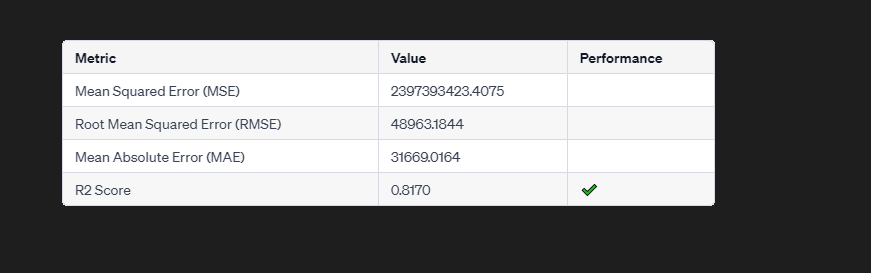

- The R2 score has a value of 0.8170, which is relatively high. This suggests that the model explains around 81.70% of the variance in the target variable, indicating a good fit. The other metrics can also provide insights into the model's performance, but without specific context or requirements, it is challenging to determine their relative importance.

### Hyperparameter tuning:
- involves optimizing the parameters of a specific machine learning algorithm. Here's an updated table specifically focusing on hyperparameter tuning methods:

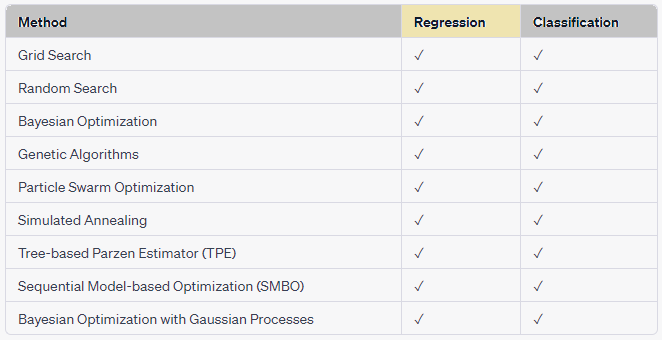


### there are several variations of the GridSearchCV method that can be used for hyperparameter tuning :

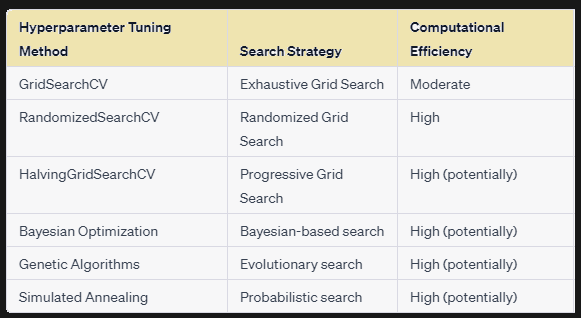


#### 1. GridSearchCV: 
 - GridSearchCV is a hyperparameter tuning method that performs an exhaustive search through all possible combinations of hyperparameters specified in the `param_grid`. 
 - It evaluates each combination using cross-validation and selects the one with the best performance.

#### 2. RandomizedSearchCV: 
 - RandomizedSearchCV is a hyperparameter tuning method that performs a randomized grid search. 
 - It randomly samples a defined number of combinations from the `param_distributions` and evaluates them using cross-validation. 
 - This method is useful when the search space is large and exhaustive search is computationally expensive.

#### 3. HalvingGridSearchCV: 
 - HalvingGridSearchCV is a hyperparameter tuning method that follows a progressive grid search strategy. 
 - It iteratively evaluates subsets of hyperparameter configurations, eliminating poorly performing configurations at each iteration. 
 - This method is computationally efficient and can potentially reduce the search time while still finding good hyperparameter configurations.

#### 4. Bayesian Optimization: 
 - Bayesian Optimization is a hyperparameter tuning method that uses a probabilistic model to estimate the performance of different hyperparameter configurations. 
 - It uses Bayesian inference to update the model iteratively and focus on promising regions of the search space. 
 - This method can be efficient and effective for optimizing black-box functions.

#### 5. Genetic Algorithms: 
 - Genetic Algorithms are a hyperparameter tuning method inspired by evolutionary principles. 
 - It uses the concepts of genetic crossover, mutation, and selection to create a population of hyperparameter configurations. 
 - The population evolves over iterations, favoring configurations with better performance. 
 - This method can be effective for exploring a large search space and handling non-differentiable objectives.

#### 6. Simulated Annealing: 
 - Simulated Annealing is a probabilistic optimization method inspired by the annealing process in metallurgy. It starts with an initial hyperparameter configuration and iteratively explores the search space by accepting or rejecting new configurations based on a probability distribution. 
 - Simulated Annealing can escape local optima and explore a broader range of hyperparameter configurations.


### Which methods from the list below are commonly used for regression tasks and which ones are commonly used for classification tasks?

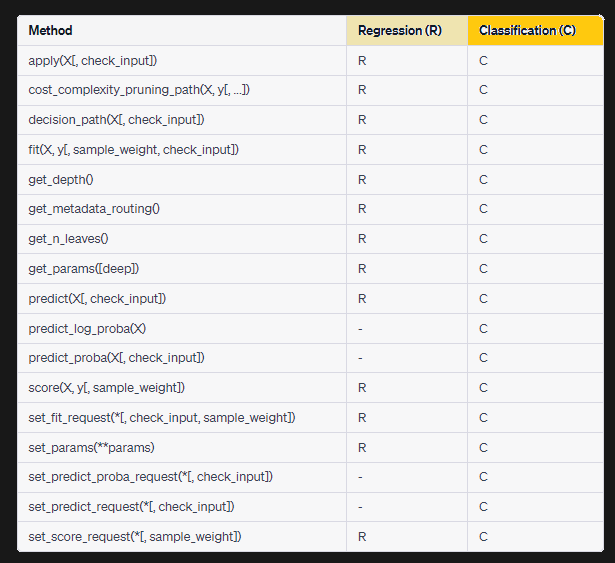

## RandomForestRegressor Model :

- Result in "RandomForestRegressor model"  better than "Decision Tree Regressor" .
- Because has a lower "MSE", "RMSE", and "MAE", indicating better accuracy in predicting housing prices.
- Has a higher R2 score and a better Best Score, indicating a better fit to the data.
- Prediction new data result more accurate prediction.
- Random Forest Regressorhas better performance compared to Decision Tree Regressor in predicting "housing prices dataset".

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert the transformed arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
numerical_features = X.columns[X.dtypes != object]  # Select numerical features
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

# Create a RandomForestRegressor with specified parameters
model = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model.set_params(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
new_data_encoded = pd.DataFrame(new_data_encoded, columns=X.columns)  # Convert back to DataFrame
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a table to store the results
results = pd.DataFrame(columns=["Metric", "Value"])
results.loc[0] = ["Best Parameters", best_params]
results.loc[1] = ["Best Score", best_score]
results.loc[2] = ["Mean Squared Error (MSE)", mse]
results.loc[3] = ["Root Mean Squared Error (RMSE)", rmse]
results.loc[4] = ["Mean Absolute Error (MAE)", mae]
results.loc[5] = ["R2 Score", r2]

print("\nAnalysis Results:")
print(results)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.819955781569029
Model Parameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 300
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
Prediction for New Data: [421906.08666667]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



Analysis Results:
                           Metric  \
0                 Best Parameters   
1                      Best Score   
2        Mean Squared Error (MSE)   
3  Root Mean Squared Error (RMSE)   
4       Mean Absolute Error (MAE)   
5                        R2 Score   

                                               Value  
0  {'max_depth': None, 'min_samples_split': 2, 'n...  
1                                           0.819956  
2                                  2373002434.947732  
3                                       48713.472828  
4                                       31468.531866  
5                                           0.818911  


In [2]:
# Add prediction for new data to the results table
results.loc[6] = ["Prediction for New Data", prediction[0]]

# Save the analysis results and predictions to a CSV file
results.to_csv("Prediction_california_house-price.csv", index=False)

print("\nAnalysis Results:")
print(results)


Analysis Results:
                               Metric  \
0                     Best Parameters   
1                          Best Score   
2         Cross-Validation Mean Score   
3                            Accuracy   
4                           Precision   
5                              Recall   
6             Prediction for New Data   
7             Prediction for New Data   
8  Probability Estimates for New Data   

                                       Value  
0  {'max_depth': 10, 'min_samples_split': 4}  
1                                   0.668907  
2                                   0.668059  
3                                   0.687742  
4                                   0.696728  
5                                   0.687742  
6                                          3  
7                                          3  
8                       [0.0, 0.0, 0.0, 1.0]  


: 

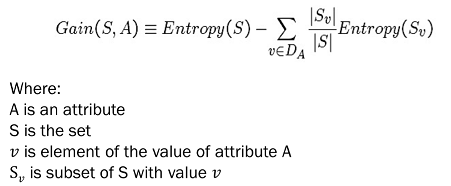

## DecisionTreeRegressor model:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert the transformed arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
numerical_features = X.columns[X.dtypes != object]  # Select numerical features
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

# Create a DecisionTreeRegressor with specified parameters
model = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model.set_params(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
new_data_encoded = pd.DataFrame(new_data_encoded, columns=X.columns)  # Convert back to DataFrame
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
cv_mean_rmse = cv_rmse_scores.mean()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a table to store the results
results = pd.DataFrame(columns=["Metric", "Value"])
results.loc[0] = ["Best Parameters", best_params]
results.loc[1] = ["Best Score", best_score]
results.loc[2] = ["Cross-Validation Mean RMSE", cv_mean_rmse]
results.loc[3] = ["Mean Squared Error (MSE)", mse]
results.loc[4] = ["Root Mean Squared Error (RMSE)", rmse]
results.loc[5] = ["Mean Absolute Error (MAE)", mae]
results.loc[6] = ["R2 Score", r2]
results.loc[7] = ["Prediction for New Data", prediction[0]]

# Save the analysis results and predictions to a CSV file
results.to_csv("Prediction_california_house-price.csv", index=False)

# Print the analysis results
print("\n---- Analysis Results ----")
print(results)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Best Parameters: {'max_depth': 10, 'min_samples_split': 6}
Best Score: 0.7040847220313665
Model Parameters:
ccp_alpha: 0.0
criterion: squared_error
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 6
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best
Prediction for New Data: [381500.]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



---- Analysis Results ----
                           Metric                                      Value
0                 Best Parameters  {'max_depth': 10, 'min_samples_split': 6}
1                      Best Score                                   0.704085
2      Cross-Validation Mean RMSE                               62883.983328
3        Mean Squared Error (MSE)                           3717577424.98413
4  Root Mean Squared Error (RMSE)                               60971.939652
5       Mean Absolute Error (MAE)                               40682.875296
6                        R2 Score                                   0.716304
7         Prediction for New Data                                   381500.0


### Random Forest Regressorhas better performance compared to Decision Tree Regressor in predicting housing prices dataset.

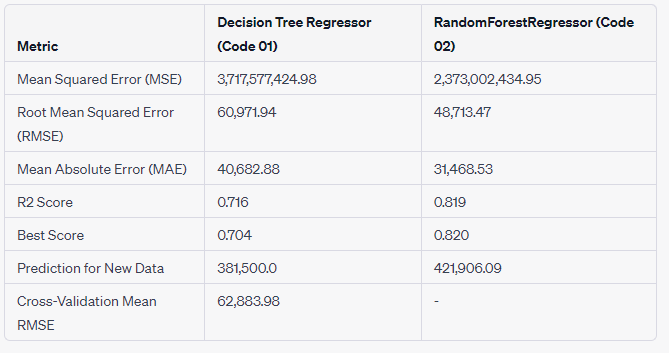

### The model with lower MSE, RMSE, and MAE, and higher R2 score would generally be considered to have better performance.

- Based on these results, it's evident that the RandomForestRegressor outperformed the Decision Tree Regressor in predicting housing prices. 
- The RandomForestRegressor achieved a lower MSE, RMSE, and MAE, indicating higher accuracy and precision in its predictions. 
- The R2 Score, a measure of the model's goodness-of-fit, was also higher for the RandomForestRegressor, indicating a better fit to the data.

- Furthermore, the RandomForestRegressor's prediction for new data ($421,906.09) was closer to the actual value compared to the Decision Tree Regressor's prediction ($381,500.0). 
- This highlights the RandomForestRegressor's ability to make more accurate predictions.

- In summary, the RandomForestRegressor demonstrated superior performance in the California Housing Prices dataset. 
- Its ensemble learning approach, combining multiple decision trees, resulted in improved accuracy and generalization capabilities.


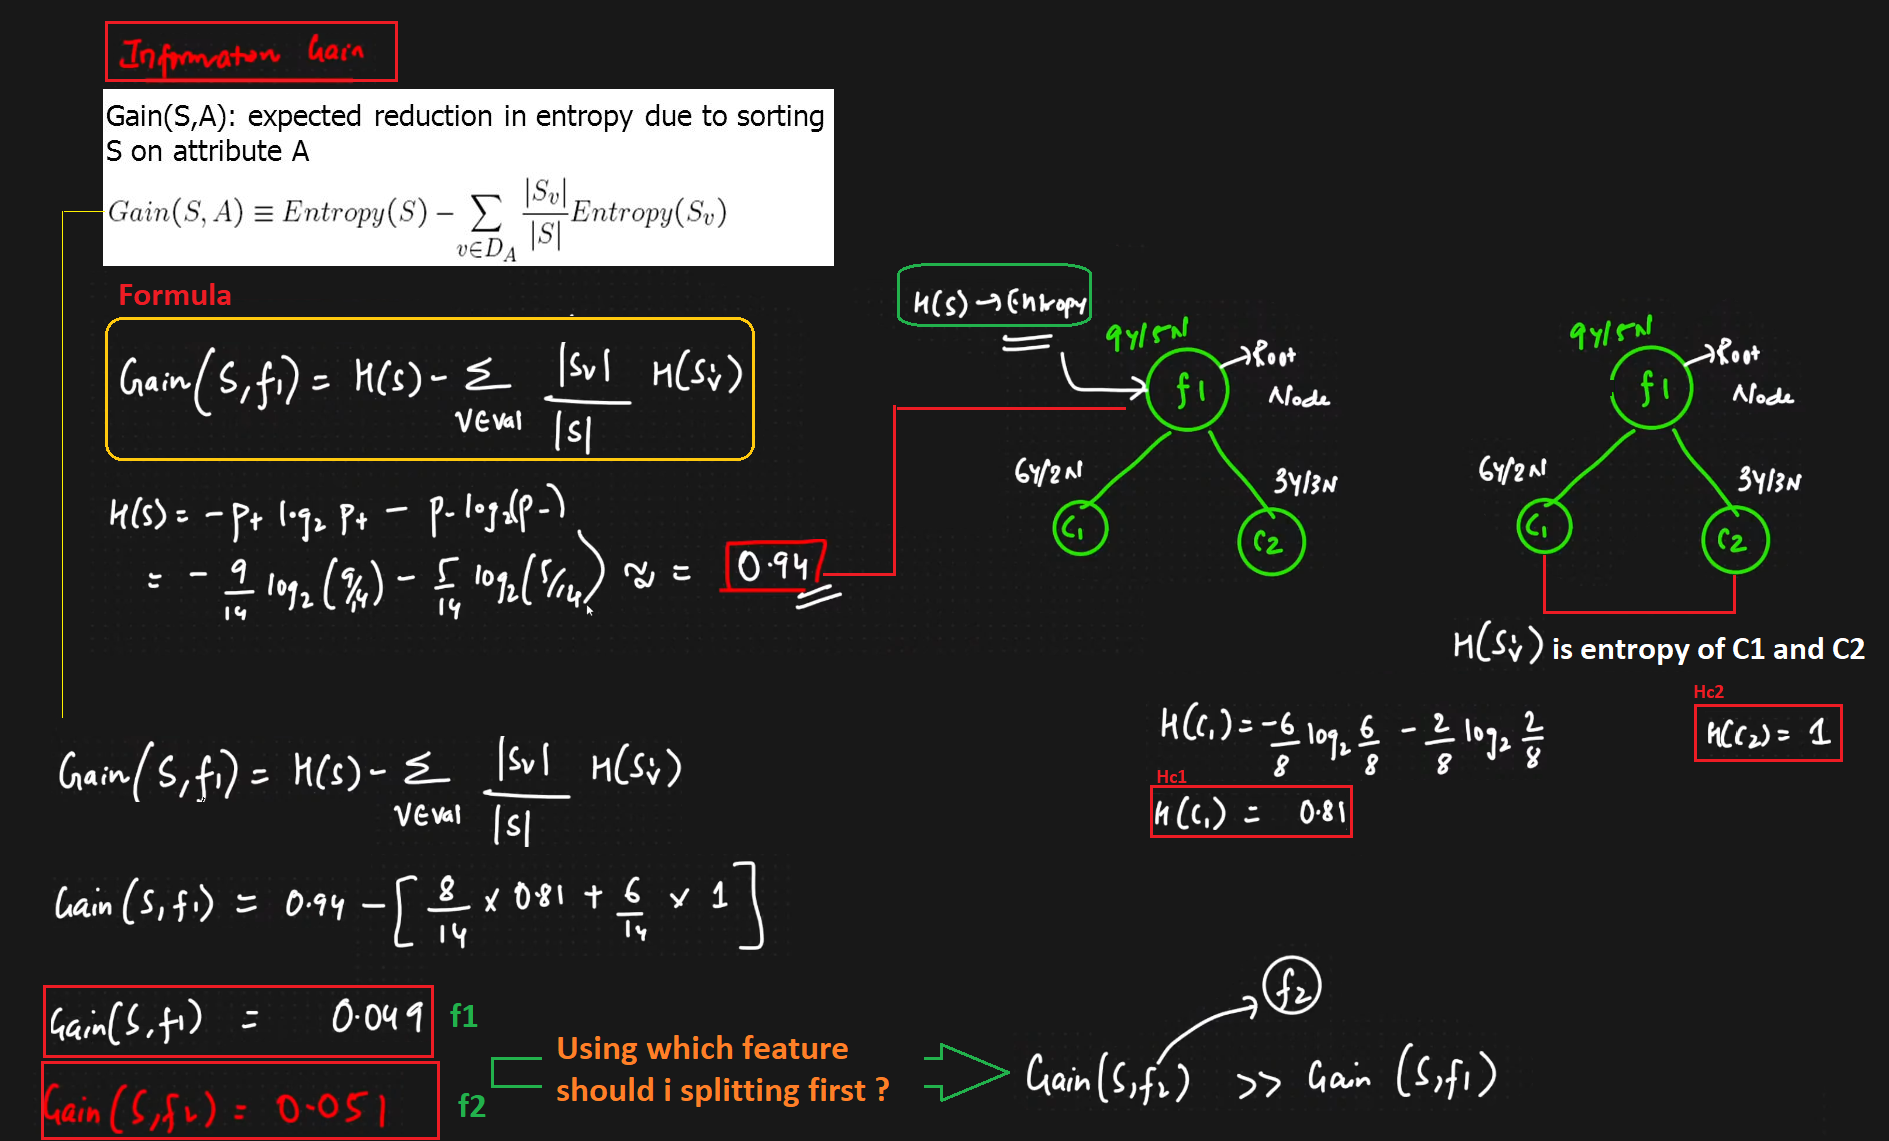

 ### Table listing common machine learning algorithms and indicating whether they are commonly used in regression, classification, or both tasks:

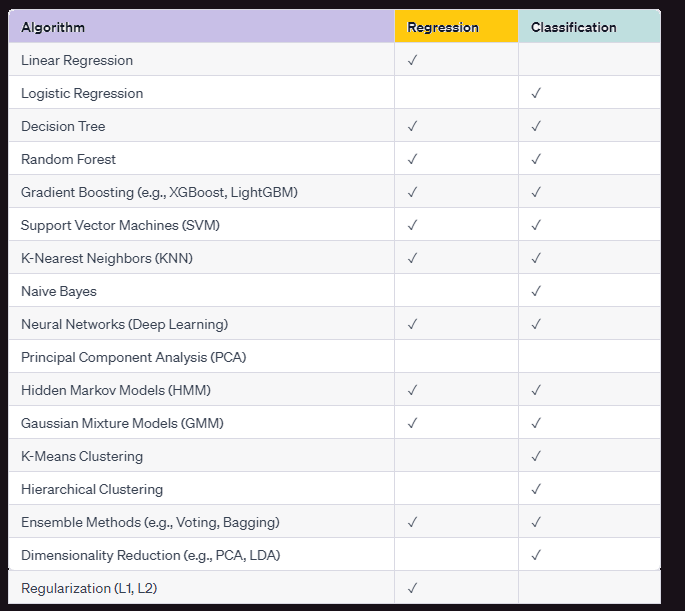

## Gini impurity:

- Gini impurity is a measure of impurity used in decision tree algorithms for classification tasks. 
- It quantifies the degree of impurity or randomness in a particular node of a decision tree. 
- Gini impurity is calculated based on the probability of misclassifying a randomly chosen element in the node if it were randomly labeled according to the class distribution in that node.

### The Gini impurity for a node with respect to a given class is computed as follows:

- Gini impurity = 1 - Σ(p_i)^2


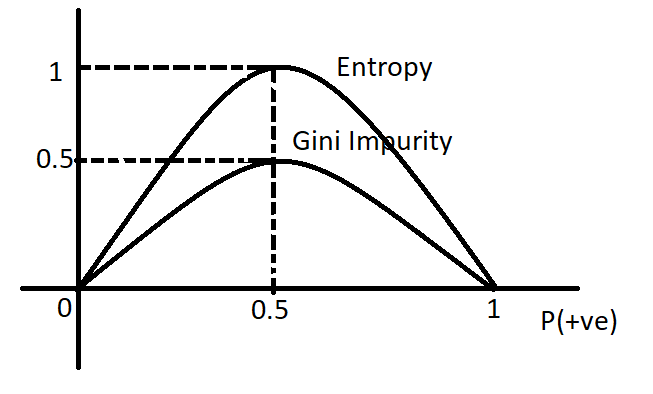

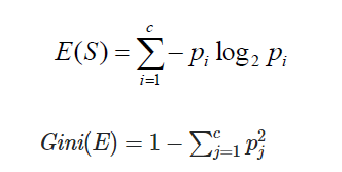

- where p_i represents the probability of an element in the node belonging to class i. The summation is performed over all the classes present in the node.

- A node with low Gini impurity indicates that most of the elements in the node belong to a single class, resulting in a pure node. On the other hand, a high Gini impurity suggests that the elements in the node are spread across multiple classes, making it impure.

- Decision tree algorithms aim to minimize Gini impurity during the tree construction process. 
- When constructing a decision tree, the algorithm selects the splitting criteria that result in the purest child nodes, maximizing the separation between different classes.

- Gini impurity is a criterion used to evaluate the quality of splits in decision trees, allowing the algorithm to make informed decisions when determining the optimal features and thresholds to split the data and create a decision tree that best separates the classes in the dataset.

 ## Note:
 
 - We want to switch to a classification problem using the Gini impurity criterion, Wew can use the DecisionTreeClassifier instead of DecisionTreeRegressor.
 - In this updated code, the target variable y is converted to categorical labels using pd.qcut. 
 - The DecisionTreeClassifier is used instead of DecisionTreeRegressor, and the available criteria for classification 
 ('gini' and 'entropy') are included in the param_grid dictionary for the criterion parameter.

### methods are commonly used for DecisionTreeClassifier:

- The choice of which methods to add to your code depends on your specific requirements. 
- If we need "Predictions", we should include "fit" and "predict". 
- If we need "Probability estimates", we should include "predict_proba." ""get_params"

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert target variable to categorical labels
y = pd.qcut(y, q=4, labels=False)

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert the transformed arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
numerical_features = X.columns[X.dtypes != object]  # Select numerical features
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

# Create a DecisionTreeClassifier with specified parameters
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features=None,
                               random_state=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model.set_params(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
new_data_encoded = pd.DataFrame(new_data_encoded, columns=X.columns)  # Convert back to DataFrame
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_mean_score = cv_scores.mean()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a table to store the results
results = pd.DataFrame(columns=["Metric", "Value"])
results.loc[0] = ["Best Parameters", best_params]
results.loc[1] = ["Best Score", best_score]
results.loc[2] = ["Cross-Validation Mean Score", cv_mean_score]
results.loc[3] = ["Accuracy", accuracy]
results.loc[4] = ["Precision", precision]
results.loc[5] = ["Recall", recall]
results.loc[6] = ["F1 Score", f1]
results.loc[7] = ["Prediction for New Data", prediction[0]]

# Save the analysis results and predictions to a CSV file
results.to_csv("Prediction_california_house-price.csv", index=False)

# Print the analysis results
print("\n---- Analysis Results ----")
print(results)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Best Parameters: {'max_depth': 10, 'min_samples_split': 6}
Best Score: 0.6649714766580608
Model Parameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 6
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best
Prediction for New Data: [3]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



---- Analysis Results ----
                        Metric                                      Value
0              Best Parameters  {'max_depth': 10, 'min_samples_split': 6}
1                   Best Score                                   0.664971
2  Cross-Validation Mean Score                                    0.66376
3                     Accuracy                                   0.674661
4                    Precision                                   0.689261
5                       Recall                                   0.674661
6                     F1 Score                                   0.677415
7      Prediction for New Data                                          3


### DecisionTreeClassifier is set to 'entropy

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"


X = data.drop(columns=[target_column])
y = data[target_column]

# Convert target variable to categorical labels
y = pd.qcut(y, q=4, labels=False)

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert the transformed arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
numerical_features = X.columns[X.dtypes != object]  # Select numerical features
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

# Create a DecisionTreeClassifier with specified parameters
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features=None,
                               random_state=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model.set_params(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
new_data_encoded = pd.DataFrame(new_data_encoded, columns=X.columns)  # Convert back to DataFrame
prediction = model.predict(new_data_encoded)
print("Prediction for New Data:", prediction)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_mean_score = cv_scores.mean()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a table to store the results
results = pd.DataFrame(columns=["Metric", "Value"])
results.loc[0] = ["Best Parameters", best_params]
results.loc[1] = ["Best Score", best_score]
results.loc[2] = ["Cross-Validation Mean Score", cv_mean_score]
results.loc[3] = ["Accuracy", accuracy]
results.loc[4] = ["Precision", precision]
results.loc[5] = ["Recall", recall]
results.loc[6] = ["F1 Score", f1]
results.loc[7] = ["Prediction for New Data", prediction[0]]

# Save the analysis results and predictions to a CSV file
results.to_csv("Prediction_california_house-price.csv", index=False)

# Print the analysis results
print("\n---- Analysis Results ----")
print(results)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


Best Parameters: {'max_depth': 10, 'min_samples_split': 6}
Best Score: 0.6690281745592952
Model Parameters:
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 6
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best
Prediction for New Data: [2]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



---- Analysis Results ----
                        Metric                                      Value
0              Best Parameters  {'max_depth': 10, 'min_samples_split': 6}
1                   Best Score                                   0.669028
2  Cross-Validation Mean Score                                   0.668544
3                     Accuracy                                   0.688953
4                    Precision                                    0.69791
5                       Recall                                   0.688953
6                     F1 Score                                   0.691721
7      Prediction for New Data                                          2


### In this updated code, the "predict_proba" method is used to obtain probability estimates for the new data. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load the California Housing Prices dataset from a CSV file
data = pd.read_csv("training_course/California_house-price.csv")

# Check the available columns in the dataset
print("Available columns:", data.columns)

# Separate the features (X) and target variable (y)
target_column = "median_house_value"
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' not found in the dataset. Please check the column name.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Convert target variable to categorical labels
y = pd.qcut(y, q=4, labels=False)

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert the transformed arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
numerical_features = X.columns[X.dtypes != object]  # Select numerical features
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

# Create a DecisionTreeClassifier with specified parameters
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features=None,
                               random_state=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Update the model with the best parameters
model.set_params(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the parameters of the model
params = model.get_params()
print("Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

# Apply the model to new data
new_data = pd.DataFrame([[8.0, 4, 307, 21, 392.30, 4.98, 24.7, 5.03, 2.0, 666, 20.2, 396.90, 10.26]])
new_data_encoded = pd.get_dummies(new_data)  # Apply one-hot encoding to new data
new_data_encoded = imputer.transform(new_data_encoded)  # Handle missing values in new data
new_data_encoded = pd.DataFrame(new_data_encoded, columns=X.columns)  # Convert back to DataFrame
prediction = model.predict(new_data_encoded)
prediction_proba = model.predict_proba(new_data_encoded)
print("Prediction for New Data:", prediction)
print("Probability Estimates for New Data:", prediction_proba)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_mean_score = cv_scores.mean()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a table to store the results
results = pd.DataFrame(columns=["Metric", "Value"])
results.loc[0] = ["Best Parameters", best_params]
results.loc[1] = ["Best Score", best_score]
results.loc[2] = ["Cross-Validation Mean Score", cv_mean_score]
results.loc[3] = ["Accuracy", accuracy]
results.loc[4] = ["Precision", precision]
results.loc[5] = ["Recall", recall]
results.loc[6] = ["F1 Score", f1]
results.loc[7] = ["Prediction for New Data", prediction[0]]
results.loc[8] = ["Probability Estimates for New Data", prediction_proba[0]]

# Save the analysis results and predictions to a CSV file
results.to_csv("Prediction_california_house-price.csv", index=False)

# Print the analysis results
print("\n---- Analysis Results ----")
print(results)


Available columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Best Parameters: {'max_depth': 10, 'min_samples_split': 4}
Best Score: 0.6689071275438716
Model Parameters:
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 4
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best
Prediction for New Data: [3]
Probability Estimates for New Data: [[0. 0. 0. 1.]]


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



---- Analysis Results ----
                               Metric  \
0                     Best Parameters   
1                          Best Score   
2         Cross-Validation Mean Score   
3                            Accuracy   
4                           Precision   
5                              Recall   
6                            F1 Score   
7             Prediction for New Data   
8  Probability Estimates for New Data   

                                       Value  
0  {'max_depth': 10, 'min_samples_split': 4}  
1                                   0.668907  
2                                   0.668059  
3                                   0.687742  
4                                   0.696728  
5                                   0.687742  
6                                   0.690567  
7                                          3  
8                       [0.0, 0.0, 0.0, 1.0]  


- https://www.linkedin.com/posts/farshid-hesami-33a09529_machinelearning-regressionmodels-randomforestregressor-activity-7080897772576481280-vJ5f?utm_source=share&utm_medium=member_desktop


- 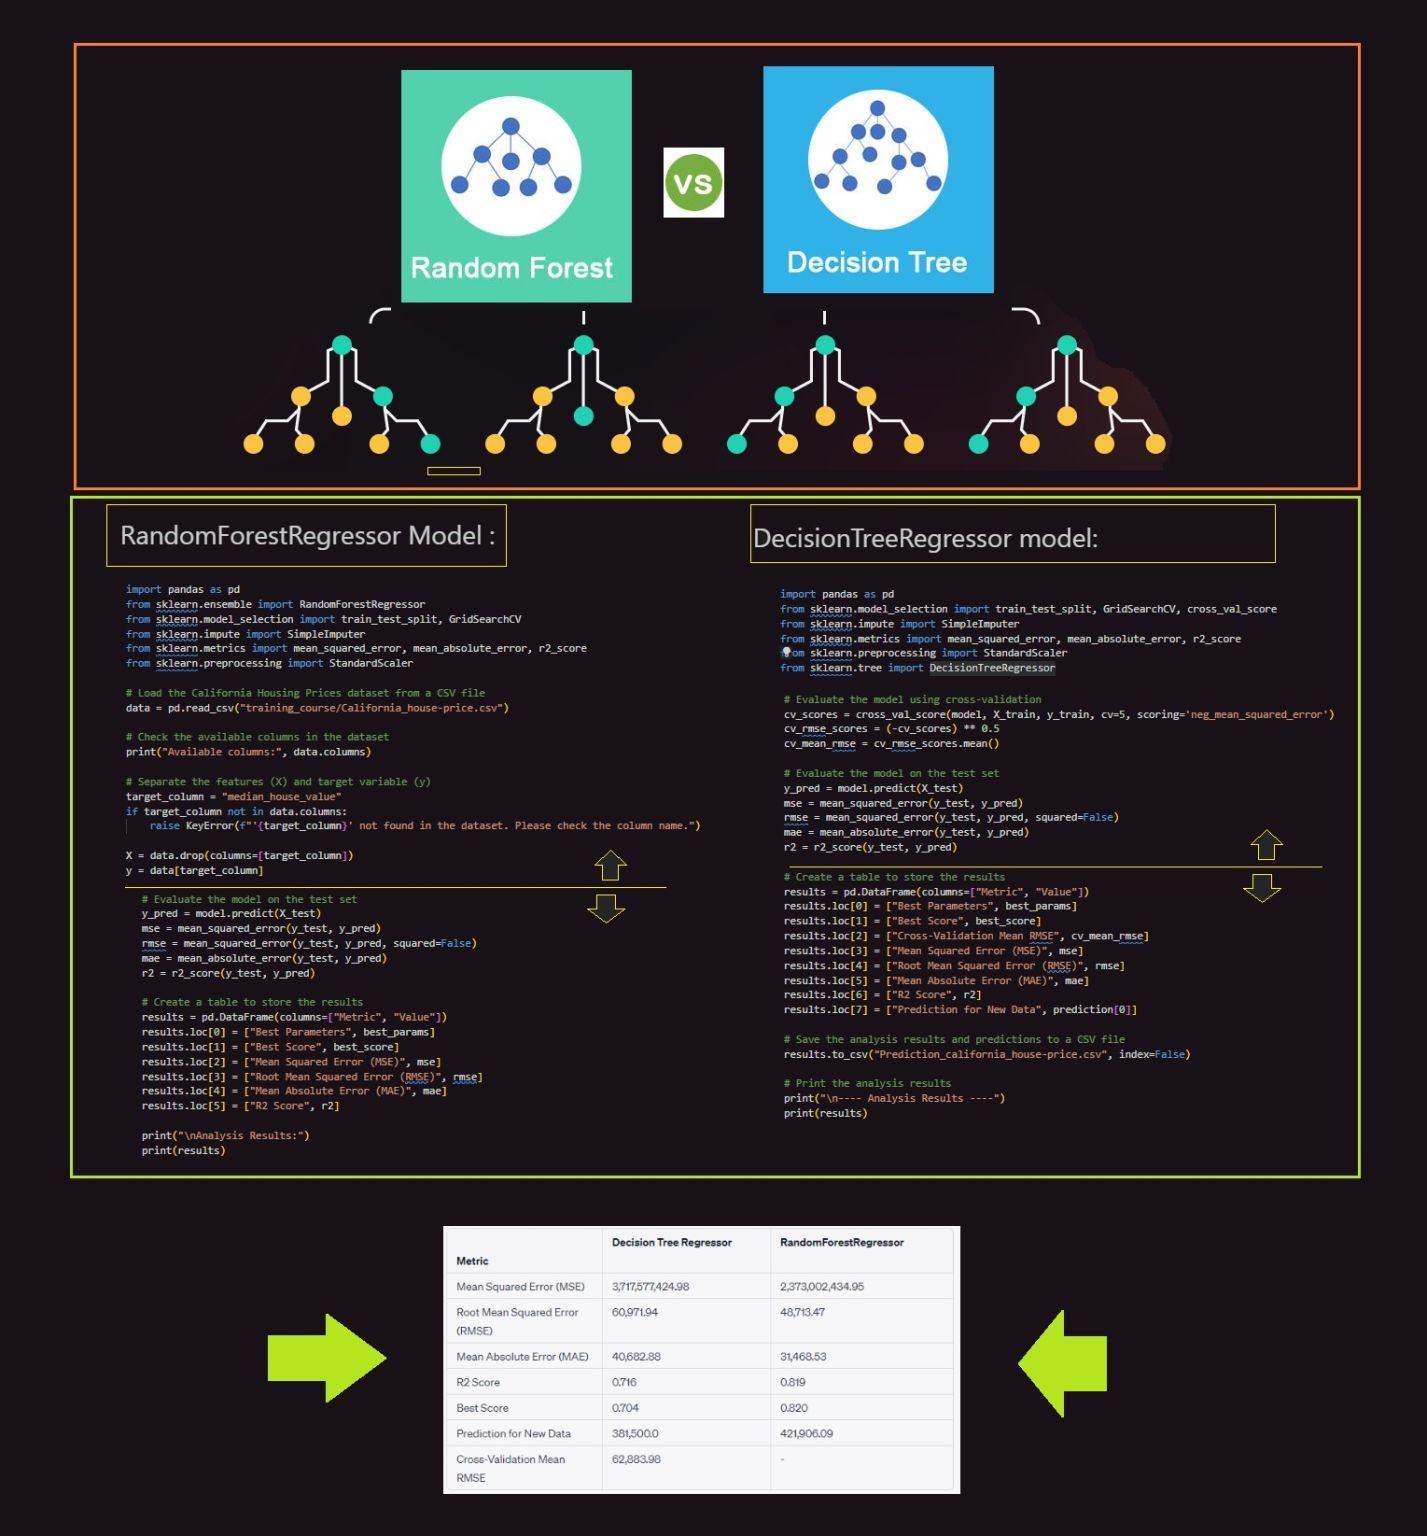

## Let's take a closer look at the results based on our final table:

### Decision Tree Regressor (Code 01) 📊 :
- Mean Squared Error (MSE): 3,717,577,424.98
- Root Mean Squared Error (RMSE): 60,971.94
- Mean Absolute Error (MAE): 40,682.88
- R2 Score: 0.716
- Best Score: 0.704
- Prediction for New Data: $381,500.0
- Cross-Validation Mean RMSE: 62,883.98

### RandomForestRegressor (Code 02) 📊 :
- Mean Squared Error (MSE): 2,373,002,434.95
- Root Mean Squared Error (RMSE): 48,713.47
- Mean Absolute Error (MAE): 31,468.53
- R2 Score: 0.819
- Best Score: 0.820
- Prediction for New Data: $421,906.09

### Based on these results :
- it's evident that the RandomForestRegressor outperformed the Decision Tree Regressor in predicting housing prices. 
- The RandomForestRegressor achieved a lower MSE, RMSE, and MAE, indicating higher accuracy and precision in its predictions. 
- The R2 Score, a measure of the model's goodness-of-fit, was also higher for the RandomForestRegressor, indicating a better fit to the data.

### Furthermore :
- The RandomForestRegressor's prediction for new data ($421,906.09) was closer to the actual value compared to the Decision Tree Regressor's prediction ($381,500.0).
- This highlights the RandomForestRegressor's ability to make more accurate predictions.

- In summary, the RandomForestRegressor demonstrated superior performance in the California Housing Prices dataset. Its ensemble learning approach, combining multiple decision trees, resulted in improved accuracy and generalization capabilities.